<a href="https://colab.research.google.com/github/mjalalimanesh/statistical-learning-ISLR-python/blob/master/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from itertools import chain, combinations
import statsmodels.api as sm

pd.set_option('precision', 2) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)

plt.style.use('seaborn') # pretty matplotlib plots

In [3]:
hitters = pd.read_csv('https://raw.githubusercontent.com/mjalalimanesh/statistical-learning-ISLR-python/master/datasets/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

hitters = hitters.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18]] # push salary at the end
hitters['League'] = pd.get_dummies(hitters['League']).iloc[:, 0]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:, 0]
hitters['NewLeague'] = pd.get_dummies(hitters['NewLeague']).iloc[:, 0]


X = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

In [5]:
# adapted from: 
# https://songhuiming.github.io/pages/2016/07/12/variable-selection-in-python/
# and:
# http://www.science.smith.edu/~jcrouser/SDS293/labs/
# takes a f**in' long time


sub = []
reg = []
kft = []

n_features = X.shape[1]

for k_features in range(1, 20):
    subsets = chain(combinations(range(n_features), k_features))

    best_score = np.inf

    for subset in subsets:
        lin_reg = sm.OLS(y, sm.add_constant(X.iloc[:, list(subset)])).fit()
        score = lin_reg.ssr
        if score < best_score:
            best_score, best_subset = score, list(subset)
            best_reg = lin_reg

    sub.append(best_subset)
    reg.append(best_reg)
    kft.append(k_features)

results = pd.DataFrame({'kft': kft, 'sub': sub, 'reg': reg},
                       columns = ['sub', 'reg', 'kft']).set_index('kft')

In [6]:
results

,sub,reg
kft,,
1,[11],<statsmodels.regression.linear_model.Regressio...
2,"[1, 11]",<statsmodels.regression.linear_model.Regressio...
3,"[1, 11, 15]",<statsmodels.regression.linear_model.Regressio...
4,"[1, 11, 14, 15]",<statsmodels.regression.linear_model.Regressio...
5,"[0, 1, 11, 14, 15]",<statsmodels.regression.linear_model.Regressio...
...,...,...
15,"[0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...",<statsmodels.regression.linear_model.Regressio...
16,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",<statsmodels.regression.linear_model.Regressio...
17,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",<statsmodels.regression.linear_model.Regressio...


In [15]:
from operator import attrgetter

results['rss'] = results['reg'].apply(attrgetter('ssr'))
results['AIC'] = results['reg'].apply(attrgetter('aic'))
results['BIC'] = results['reg'].apply(attrgetter('bic'))
results['AdjR2'] = results['reg'].apply(attrgetter('rsquared_adj'))

results

,sub,reg,rss,AIC,BIC,AdjR2
kft,,,,,,
1,[11],<statsmodels.regression.linear_model.Regressio...,3.62e+07,3862.14,3869.28,0.32
2,"[1, 11]",<statsmodels.regression.linear_model.Regressio...,3.06e+07,3820.49,3831.20,0.42
3,"[1, 11, 15]",<statsmodels.regression.linear_model.Regressio...,2.92e+07,3810.21,3824.50,0.45
4,"[1, 11, 14, 15]",<statsmodels.regression.linear_model.Regressio...,2.80e+07,3800.46,3818.32,0.47
5,"[0, 1, 11, 14, 15]",<statsmodels.regression.linear_model.Regressio...,2.71e+07,3794.63,3816.06,0.48
...,...,...,...,...,...,...
15,"[0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...",<statsmodels.regression.linear_model.Regressio...,2.42e+07,3784.76,3841.91,0.52
16,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",<statsmodels.regression.linear_model.Regressio...,2.42e+07,3786.59,3847.31,0.52
17,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",<statsmodels.regression.linear_model.Regressio...,2.42e+07,3788.48,3852.78,0.51


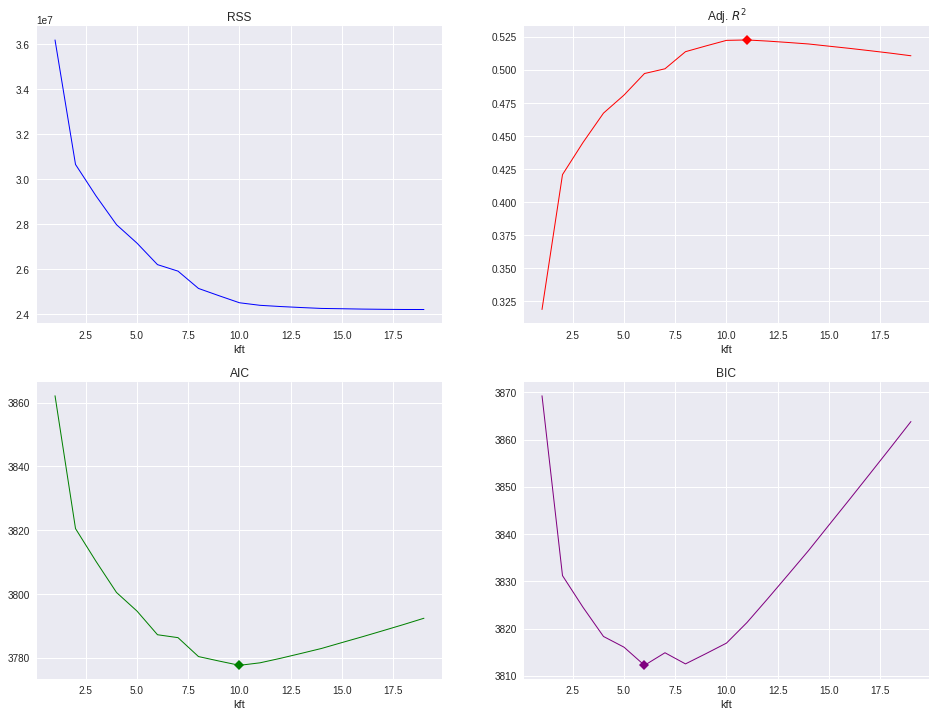

In [20]:
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
results.rss.plot(title='RSS', lw=1, color='blue')

plt.subplot(2, 2, 2)
max_r2a = results.AdjR2.argmax()
results.AdjR2.plot(title='Adj. $R^2$', markevery=[max_r2a], marker='D', lw=1, color='red')

plt.subplot(2, 2, 3)
min_aic = results.AIC.argmin()
results.AIC.plot(title='AIC', markevery=[min_aic], marker='D', lw=1, color='green')

plt.subplot(2, 2, 4)
min_bic = results.BIC.argmin()
results.BIC.plot(title='BIC', markevery=[min_bic], marker='D', lw=1, color='purple');